In [1041]:
# Import of relevant packages
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
# Set random seed 
RSEED = 42
warnings.filterwarnings("ignore")

In [1042]:
import pickle
with open('../data/data_test.pkl', 'rb') as f:
    data = pickle.load(f)

In [1043]:
data.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test', 'df_combined', 'df_combined_encoded', 'X_train_resampled', 'y_train_resampled'])

In [1044]:
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test =  data["y_test"]
df_combined =  data["df_combined"]
df_combined_encoded = data["df_combined_encoded"]
X_train_resampled = data["X_train_resampled"]
y_train_resampled = data["y_train_resampled"]

In [1045]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (104496, 106)
X_test shape: (26124, 106)
y_train shape: (104496,)
y_test shape: (26124,)


In [1046]:
#drop columns which are twice in the dataset
#X_train = X_train.loc[:, ~X_train.columns.duplicated()]
#X_test = X_test.loc[:, ~X_test.columns.duplicated()]

In [1047]:
X_train.columns.value_counts()

counter_statue_5      2
counter_statue_1      2
counter_statue_4      2
counter_code_201.0    1
counter_code_305.0    1
                     ..
region_312            1
region_311            1
region_310            1
region_309            1
counter_type_GAZ      1
Name: count, Length: 103, dtype: int64

In [1048]:

#drop client id
df_combined = df_combined.drop(['client_id'], axis=1)
df_combined.head()

,district,client_catg,region,creation_date,target,months_number,invoice_date,counter_coefficient,tarif_type,counter_statue,counter_code,reading_remarque,counter_type,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4
0,60,11,101,1994-12-31,0.0,4.628571,2011-09-02 18:30:51.428571392,1.0,11.0,0,203.0,6.0,ELEC,76.135802,2.283951,0.000000,0.000000
1,69,11,107,2002-05-29,0.0,4.324324,2012-03-20 20:45:24.324324352,1.0,11.0,0,203.0,6.0,ELEC,128.931250,0.000000,0.000000,0.000000
2,62,11,301,1986-03-13,0.0,6.444444,2011-06-11 05:20:00.000000000,1.0,11.0,0,203.0,6.0,ELEC,123.922414,5.879310,0.000000,0.000000
3,69,11,105,1996-07-11,0.0,4.200000,2009-01-07 18:00:00.000000000,1.0,11.0,0,413.0,6.0,ELEC,0.285714,0.000000,0.000000,0.000000
4,62,11,303,2014-10-14,0.0,3.714286,2017-06-04 01:42:51.428571392,1.0,11.0,0,207.0,9.0,ELEC,178.692308,28.230769,31.596154,9.884615


In [1049]:
df_combined_encoded.dtypes

client_id                  object
creation_date               int64
target                    float64
months_number             float64
invoice_date                int64
                           ...   
reading_remarque_8.0         bool
reading_remarque_9.0         bool
reading_remarque_203.0       bool
reading_remarque_413.0       bool
counter_type_GAZ             bool
Length: 108, dtype: object

In [1050]:
#num_features = list(df_combined.columns[df_combined.dtypes == 'float64'])
#num_features.remove('target')
#num_features

In [1051]:
df_combined.dtypes

district                      category
client_catg                   category
region                        category
creation_date           datetime64[ns]
target                         float64
months_number                  float64
invoice_date            datetime64[ns]
counter_coefficient            float64
tarif_type                    category
counter_statue                category
counter_code                  category
reading_remarque              category
counter_type                  category
consommation_level_1           float64
consommation_level_2           float64
consommation_level_3           float64
consommation_level_4           float64
dtype: object

In [1052]:
#cat_features = list(df_combined_encoded.columns[df_combined_encoded.dtypes == 'bool'])

#cat_features


### Logistic Regression

In [1085]:
# use standard scaler for numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)



In [1054]:
# logistic regression model
logreg = LogisticRegression(random_state=RSEED, max_iter=1000)


In [1055]:
y_train_pred = cross_val_predict(logreg, X_train_scaled, y_train, cv=5)

In [1056]:
# Calculating the accuracy for the LogisticRegression Classifier 
print('Cross validation scores y_train:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train, y_train_pred)))
print("Recall: {:.2f}".format(recall_score(y_train, y_train_pred)))
print("Precision: {:.2f}".format(precision_score(y_train, y_train_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_train, y_train_pred)))
print("F1: {:.2f}".format(f1_score(y_train, y_train_pred)))


Cross validation scores y_train:
-------------------------
Accuracy: 0.95
Recall: 0.00
Precision: 0.39
AUC: 0.50
F1: 0.01


In [1075]:
param_logreg = {'C': [0.001, 0.01],
                'penalty': ['l1', 'l2'],
                'solver': ['liblinear', 'saga'],
                'class_weight': ['balanced',{0: 1, 1: 20}
]
               }

grid_logreg = GridSearchCV(logreg, param_logreg, cv=5, scoring='roc_auc', verbose=5, n_jobs=-1)

In [1076]:
grid_imbalanced = grid_logreg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.699 total time=   0.8s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.709 total time=   1.3s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.703 total time=   1.4s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.705 total time=   1.2s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.690 total time=   1.4s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.712 total time=   1.5s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.717 total time=   1.4s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.712 total time=   1.6s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0

In [1077]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_imbalanced.best_score_))
print("Best parameters:\n{}".format(grid_imbalanced.best_params_))

Best score:
0.71
Best parameters:
{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [1078]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model_imbalanced = grid_imbalanced.best_estimator_
best_model_imbalanced

LogisticRegression(C=0.001, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [1079]:
# Calculating the accuracy, recall and precision for the test set with the optimized model
y_test_imba_pred = best_model_imbalanced.predict(X_test_scaled)
y_test_imba_pred_proba = best_model_imbalanced.predict_proba(X_test_scaled)[:,1]

print('Best Log-Reg Model scores y_train:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_test_imba_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_test_imba_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_test_imba_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_test_imba_pred_proba)))
print("F1: {:.2f}".format(f1_score(y_test, y_test_imba_pred)))

Best Log-Reg Model scores y_train:
-------------------------
Accuracy: 0.64
Recall: 0.69
Precision: 0.10
AUC: 0.72
F1: 0.17


### Resampled

In [1086]:
y_train_resampled_pred = cross_val_predict(logreg, X_train_resampled_scaled, y_train_resampled, cv=5)

In [1087]:
# Calculating the accuracy for the LogisticRegression Classifier 
print('Cross validation scores y_train_resampled:')
print('-------------------------')
print("Accuracy: {:.2f}".format(accuracy_score(y_train_resampled, y_train_resampled_pred)))
print("Recall: {:.2f}".format(recall_score(y_train_resampled, y_train_resampled_pred)))
print("Precision: {:.2f}".format(precision_score(y_train_resampled, y_train_resampled_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_train_resampled, y_train_resampled_pred)))
print("F1: {:.2f}".format(f1_score(y_train_resampled, y_train_resampled_pred)))

Cross validation scores y_train_resampled:
-------------------------
Accuracy: 0.91
Recall: 0.85
Precision: 0.97
AUC: 0.91
F1: 0.90


In [1088]:
grid_resampled = grid_logreg.fit(X_train_resampled_scaled, y_train_resampled)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.883 total time=   6.8s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.973 total time=   7.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.971 total time=   7.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.972 total time=   7.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.972 total time=   7.2s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.886 total time=   2.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.974 total time=   2.2s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.976 total time=   2.3s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.974 total time=   2.4s
[CV 5/5] END C=0.001, class_weight=ba

/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.885 total time= 4.4min


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.976 total time= 4.4min
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=liblinear;, score=0.890 total time=  15.0s
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=liblinear;, score=0.975 total time=  15.2s


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.885 total time= 5.9min
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=liblinear;, score=0.976 total time=  15.8s


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.976 total time= 6.0min


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.976 total time= 6.0min
[CV 4/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=liblinear;, score=0.975 total time=  16.6s
[CV 5/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=liblinear;, score=0.975 total time=  16.8s


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, class_weight=balanced, penalty=l1, solver=saga;, score=0.976 total time= 6.1min
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=liblinear;, score=0.890 total time=   5.4s
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=liblinear;, score=0.975 total time=   5.8s
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=liblinear;, score=0.976 total time=   6.1s
[CV 4/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=liblinear;, score=0.975 total time=   5.5s
[CV 5/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=liblinear;, score=0.975 total time=   5.2s


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.976 total time= 4.8min


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, class_weight=balanced, penalty=l2, solver=saga;, score=0.976 total time= 4.8min
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=saga;, score=0.976 total time= 3.9min
[CV 1/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=saga;, score=0.890 total time= 3.8min


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=saga;, score=0.890 total time= 6.0min
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=saga;, score=0.975 total time= 6.0min
[CV 3/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=saga;, score=0.976 total time= 2.6min
[CV 4/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=saga;, score=0.975 total time= 6.0min


/Users/da.ma.ro/Documents/new-repo/gas-fraud-team-crime/.venv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l1, solver=saga;, score=0.975 total time= 6.0min
[CV 2/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=saga;, score=0.975 total time= 3.6min
[CV 4/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=saga;, score=0.975 total time= 3.2min
[CV 5/5] END C=0.01, class_weight={0: 1, 1: 20}, penalty=l2, solver=saga;, score=0.975 total time= 2.6min


In [1089]:
# Show best parameters
print('Best score:\n{:.2f}'.format(grid_resampled.best_score_))
print("Best parameters:\n{}".format(grid_resampled.best_params_))

Best score:
0.96
Best parameters:
{'C': 0.01, 'class_weight': {0: 1, 1: 20}, 'penalty': 'l2', 'solver': 'liblinear'}


In [1090]:
# Save best model (including fitted preprocessing steps) as best_model 
best_model_resampled = grid_resampled.best_estimator_
best_model_resampled

LogisticRegression(C=0.01, class_weight={0: 1, 1: 20}, max_iter=1000,
                   random_state=42, solver='liblinear')

### Final Evaluation resampled log regression

In [1100]:
# Calculating the accuracy, recall and precision for the test set with the optimized model
y_test_resampled_pred = best_model_resampled.predict(X_test_scaled)
y_test_resampled_pred_proba = best_model_resampled.predict_proba(X_test_scaled)
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_test_resampled_pred)))
print("Recall: {:.2f}".format(recall_score(y_test, y_test_resampled_pred)))
print("Precision: {:.2f}".format(precision_score(y_test, y_test_resampled_pred)))
print("AUC: {:.2f}".format(roc_auc_score(y_test, y_test_resampled_pred_proba[:,1])))

Accuracy: 0.08
Recall: 0.99
Precision: 0.06
AUC: 0.69


In [1101]:
print("-----"*15)
print("Confusion Matrix: \n", 
confusion_matrix(y_test, y_test_resampled_pred))

---------------------------------------------------------------------------
Confusion Matrix: 
 [[  698 24004]
 [   11  1411]]


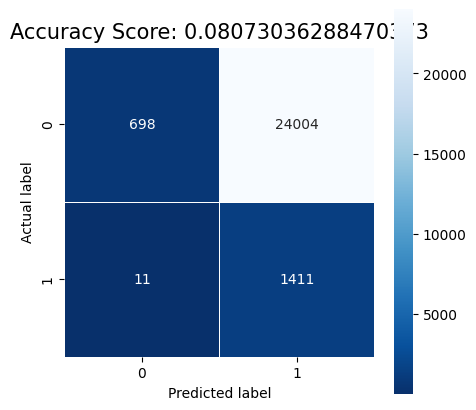

In [1102]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_test_resampled_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_test_resampled_pred))
plt.title(all_sample_title, size = 15);


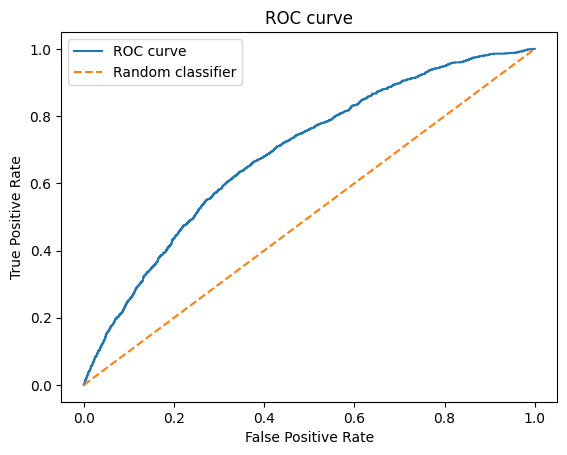

In [1095]:
# plot roc curve

fpr, tpr, thresholds = roc_curve(y_test, y_test_resampled_pred_proba[:,1])
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()